In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import ensemble, cross_validation, learning_curve, metrics 

import numpy as np
import pandas as pd

C:\Users\1\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\1\Anaconda2\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# data review

In [4]:
train_df = pd.read_csv('train.csv',sep='.',header=[0,345])
test_df = pd.read_csv('test.csv')


In [5]:
with open("train.csv") as f:
    lis=[line.split() for line in f]        # create a list of lists


In [6]:
train=pd.DataFrame(lis)

In [7]:
train[:5]

,0,1,2,3,4,5,6,7,8,9,...,337,338,339,340,341,342,343,344,345,346
0,0,1,2,3,4,5,6,7,8,9,...,337,338,339,340,341,342,343,344,345,None
1,0,1,1,0,0,0,0,0,0.090909091,0,...,0.22139539999999996,0,1,0,0,0.222222222,1,1,1,1
2,1,1,1,0,0,1,0,0,0.090909091,0,...,0.24150839999999998,0,1,0,0,0.111111111,1,1,1,0
3,2,0,1,0,0,1,0,0,0.090909091,0,...,0.12306700000000001,0,1,0,0,0.444444444,1,1,1,1
4,3,0,1,0,0,1,0,0,0.13636363599999998,0,...,0.2960645,0,0,1,0,0.222222222,1,1,1,0


In [8]:
trainm=train[1:]

In [9]:
trainm=trainm.drop([0], axis=1)

In [10]:
X=trainm.drop([1], axis=1)
Y=trainm[1]

In [11]:
# trainm[1]=pd.to_numeric(trainm[1].values)

In [12]:
# trainm[1].mean()

In [13]:
X=X.convert_objects(convert_numeric=True)

C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [14]:
trainm[4].mean()

inf

In [15]:
X=trainm.drop([1], axis=1)
Y=trainm[1]

In [16]:
from sklearn.preprocessing import StandardScaler

X_scaled=StandardScaler().fit_transform(X)

In [17]:
print X_scaled[:5]

[[ 0.15032543 -0.14975425 -0.01280474 ...  0.12112451  0.22007777
   0.77256627]
 [ 0.15032543 -0.14975425 -0.01280474 ...  0.12112451  0.22007777
  -1.29438734]
 [ 0.15032543 -0.14975425 -0.01280474 ...  0.12112451  0.22007777
   0.77256627]
 [ 0.15032543 -0.14975425 -0.01280474 ...  0.12112451  0.22007777
  -1.29438734]
 [ 0.15032543 -0.14975425 -0.01280474 ...  0.12112451  0.22007777
   0.77256627]]


In [18]:
from sklearn import ensemble

In [19]:
rf = ensemble.RandomForestClassifier(n_estimators = 100,n_jobs=-1)

In [20]:
rf.fit(X_scaled,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
with open("test.csv") as f:
    lis1=[line.split() for line in f]        # create a list of lists
    
test=pd.DataFrame(lis1)
test=test[1:]
test=test.drop([0], axis=1)
test=test.convert_objects(convert_numeric=True)

C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys


In [22]:
from sklearn.preprocessing import StandardScaler

X_test_scaled=StandardScaler().fit_transform(test)

In [23]:
pred=rf.predict(X_test_scaled)

In [24]:
print pred[:30]
pred.shape

['0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0']


(4166L,)

In [25]:
submission = pd.DataFrame({
        "_ID_": range(0,4166),
        "_VAL_": pred
    })
submission.to_csv('submission.csv', index=False)

In [26]:
from sklearn.cross_validation import train_test_split
(X_train, 
 X_test, 
 y_train, y_test) = train_test_split(X_scaled, Y, 
                                     test_size=0.3, 
                                     random_state=0)

In [27]:
rf2= ensemble.RandomForestClassifier(n_estimators = 1000,n_jobs=-1)
rf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
pred2=rf2.predict(X_test)
submission = pd.DataFrame({
        "_ID_": range(0,4166),
        "_VAL_": pred2
    })
submission.to_csv('submission_rf_1000.csv', index=False)

ValueError: arrays must all be same length

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,pred2)

0.8289617486338798

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
LR=LogisticRegression()
LR.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
pred3=LR.predict(X_test)
accuracy_score(y_test,pred3)

0.8221857923497268

In [34]:
SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_train,y_train)
pred4=sgd.predict(X_test)
accuracy_score(y_test,pred4)

C:\Users\1\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7356284153005465

In [35]:
import xgboost as xgb

In [36]:
gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_train, y_train)
predictions = gbm.predict(X_test)

C:\Users\1\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [37]:
accuracy_score(y_test,predictions)

0.8222950819672131

In [38]:
gbm.fit(X_test,y_test)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.9, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=2, missing=None, n_estimators=2000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [39]:
pred_gbm=gbm.predict(X_test_scaled)

C:\Users\1\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [40]:
# тут грейдер дал 0.577
print pred_gbm[:10]
submission = pd.DataFrame({
        "_ID_": range(0,4166),
        "_VAL_": pred_gbm
    })
submission.to_csv('submission_gbm.csv', index=False)

['0' '0' '0' '0' '1' '1' '0' '0' '0' '0']


In [62]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc_score(y_test, predictions)

ValueError: Data is not binary and pos_label is not specified

In [41]:
sgd.fit(X_test,y_test)
pred4=sgd.predict(X_test_scaled)
print pred4[:10]

['0' '0' '0' '0' '1' '1' '0' '0' '1' '0']


In [42]:
LR.fit(X_test,y_test)
pred3=LR.predict(X_test_scaled)
print pred3[:10]

['0' '0' '0' '0' '0' '1' '0' '0' '0' '0']


In [43]:
print pred2[:10]

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0']


In [44]:
Y.shape


(30500L,)

In [45]:
X_scaled.shape

(30500L, 345L)

In [46]:
corr=[]
X_scaled[0]

array([ 1.50325425e-01, -1.49754249e-01, -1.28047376e-02, -8.82225574e-01,
       -2.49667605e-02, -2.68669340e-02, -2.32793156e-01, -5.79265389e-02,
       -1.49754249e-01,  2.45968891e-01,  1.28047376e-02,  1.18021431e-01,
        2.47189025e-01, -8.50426825e-02, -1.44993212e-01, -6.46633225e-02,
       -5.31756068e-02, -1.59966539e-01, -1.63277327e-01, -2.16035280e-01,
       -2.00789763e-01, -2.32016813e-01, -1.93611837e-01, -1.70846304e-01,
       -1.72969020e-01, -7.35263092e-02, -5.67756298e-02, -7.95924687e-02,
       -7.12376581e-02, -1.48259798e-01, -2.49250164e-01, -8.90576352e-02,
       -1.49066202e-01,  2.70172532e+00, -2.80723860e-01, -4.44289563e-01,
       -1.95698422e-01, -2.02111503e-01, -3.61955767e-01, -1.71961096e-01,
       -3.42906039e-01, -2.41743161e-01, -1.35889501e-01, -2.51099843e-01,
       -3.85939107e-01, -3.86947785e-01, -4.65865266e-01, -3.59169049e-01,
       -3.48256092e-01, -2.68011556e-01, -3.82004269e-01, -1.57579043e-01,
       -1.21124509e-01, -

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [48]:
X1=trainm.drop([1], axis=1)
Y1=trainm[1]

In [49]:
corr_matrix=trainm.astype(float).corr()

In [50]:
corr_matrix[1]

1      1.000000
2      0.037239
3     -0.036855
4     -0.005955
5      0.117453
6      0.015884
7      0.019446
8      0.017294
9     -0.019511
10    -0.036855
11     0.061143
12    -0.007441
13     0.028363
14     0.028233
15    -0.018219
16    -0.007645
17    -0.008764
18    -0.013408
19    -0.037554
20    -0.006373
21     0.053257
22    -0.020066
23    -0.063883
24    -0.022028
25    -0.024692
26     0.031895
27    -0.010740
28    -0.011250
29    -0.013160
30    -0.010141
         ...   
317   -0.011506
318   -0.015041
319    0.014762
320   -0.127962
321   -0.054777
322    0.000709
323    0.105359
324   -0.132199
325   -0.125009
326   -0.131163
327   -0.114014
328   -0.102730
329    0.083577
330   -0.083556
331    0.050785
332    0.032342
333   -0.124391
334   -0.125158
335   -0.101594
336   -0.129681
337   -0.101528
338   -0.145722
339    0.155522
340    0.050763
341   -0.009132
342    0.045582
343    0.046203
344    0.027593
345    0.054138
346    0.057951
Name: 1, Length: 346, dt

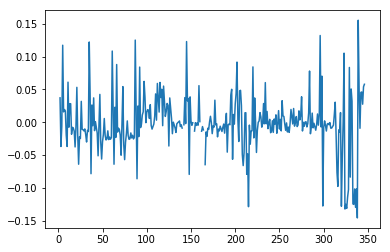

In [51]:
plt.plot(corr_matrix[1][1:])


In [52]:
ii=0
indexes=[]
for j in corr_matrix[1]:
    if j>=0.04:
        indexes.append(ii)
        ii=ii+1
    if j<=-0.04:
        indexes.append(ii)
        ii=ii+1
    else:
        ii=ii+1

In [ ]:
print predictions[:10]
submission = pd.DataFrame({
        "_ID_": range(0,4166),
        "_VAL_": predictions
    })
submission.to_csv('submission_LR_PCA.csv', index=False)

In [ ]:
predictions.shape

In [ ]:
print predictions[:200]

In [53]:
gbm2 = xgb.XGBClassifier(
learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_train, y_train)
predictionsG = gbm2.predict(X_test)

C:\Users\1\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [54]:
accuracy_score(y_test,predictionsG)

0.8300546448087431

In [55]:
gbm2.fit(X_test,y_test)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.9, learning_rate=0.02, max_delta_step=0, max_depth=4,
       min_child_weight=2, missing=None, n_estimators=2000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [56]:
pred_gbm=gbm2.predict(X_test_scaled)

C:\Users\1\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [59]:
pred_gbm[:20]

array(['0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '0', '0', '0'], dtype=object)

In [61]:
#тут грейдер дал 0.55
submission = pd.DataFrame({
        "_ID_": range(0,4166),
        "_VAL_": pred_gbm
    })
submission.to_csv('submission_gbm2.csv', index=False)